<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Convolutional%20Neural%20Network/CNN_For_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Model

In [3]:
#Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
i = Input(shape = x_train[0].shape)
# x = Conv2D(32,(3,3), strides = 2, activation = 'relu')(i)
# x = Conv2D(64,(3,3), strides = 2, activation = 'relu')(x)
# x = Conv2D(128,(3,3), strides = 2, activation = 'relu')(x)

x = Conv2D(32,(3,3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)



x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)


In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs=50)

In [7]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip= True)
train_generater = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generater, validation_data = (x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
1562/1562 [==============================] - 47s 22ms/step - loss: 1.9655 - accuracy: 0.3888 - val_loss: 1.3190 - val_accuracy: 0.5289
Epoch 2/50
1562/1562 [==============================] - 33s 21ms/step - loss: 1.4076 - accuracy: 0.4960 - val_loss: 1.2635 - val_accuracy: 0.5515
Epoch 3/50
1562/1562 [==============================] - 34s 22ms/step - loss: 1.2997 - accuracy: 0.5439 - val_loss: 1.3333 - val_accuracy: 0.5495
Epoch 4/50
1562/1562 [==============================] - 34s 22ms/step - loss: 1.2396 - accuracy: 0.5680 - val_loss: 1.0530 - val_accuracy: 0.6338
Epoch 5/50
1562/1562 [==============================] - 35s 22ms/step - loss: 1.1911 - accuracy: 0.5836 - val_loss: 1.2850 - val_accuracy: 0.5964
Epoch 6/50
1562/1562 [==============================] - 34s 22ms/step - loss: 1.1569 - accuracy: 0.5984 - val_loss: 2.2195 - val_accuracy: 0.4897
Epoch 7/50
1562/1562 [==============================] - 34s 22ms/step - loss: 1.1115 - accuracy: 0.6163 - val_loss: 1.0825 -

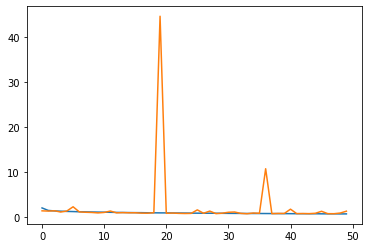

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')


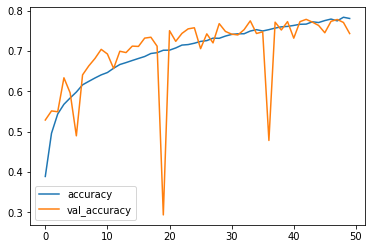

In [9]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Confusion matrix, wihtout normalization
[[750  37  51  12  10   5  21  15  38  61]
 [  4 924   3   3   0   1   3   1   6  55]
 [ 51  17 633  31  52  44  89  58   9  16]
 [ 11  21  62 520  38 119 109  75  10  35]
 [ 16   7  90  34 590   8 114 130   3   8]
 [  5  14  61 121  29 582  58 112   2  16]
 [  6   5  34  32  15   7 883   9   1   8]
 [  8   7  26  14  21  26  18 864   0  16]
 [ 44  63  11   5   2   1   5   8 785  76]
 [  7  69   5   1   1   0   1   6   5 905]]


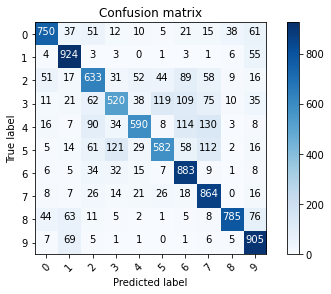

In [10]:
def plot_confusion_matirx(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    print("Normalized confusion matrix")

  else:

    print('Confusion matrix, wihtout normalization')

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt), horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matirx(cm, list(range(10)))


In [11]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: horse predicted: truck')

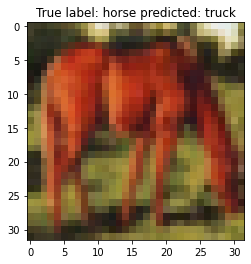

In [12]:
misclassfied_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassfied_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s predicted: %s' %(labels[y_test[i]], labels[p_test[i]]))

In [13]:
model.save('/content/drive/MyDrive/CIFAR_Model.h5')